  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


C:\Users\Admin\AppData\Local\Temp\ipykernel_107508\2961918235.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=symbol, interval=interval, period=period)
[*********************100%***********************]  1 of 1 completed

1435 lignes téléchargées
Données normalisées: (1435, 1)
Générateur créé avec look_back=72
Nombre de batches: 39



C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0253 - val_loss: 0.0033
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012 - val_l

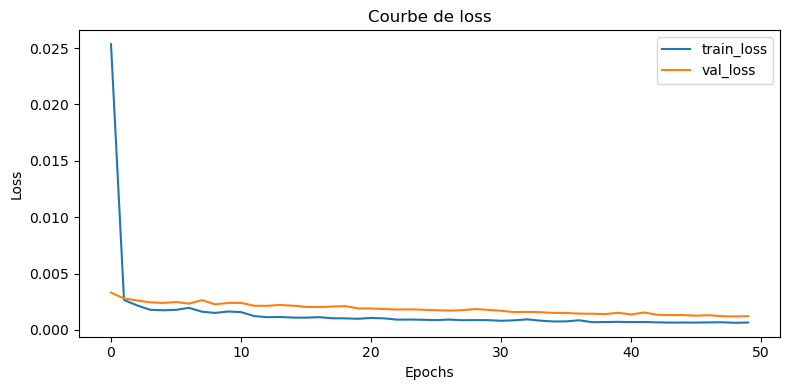

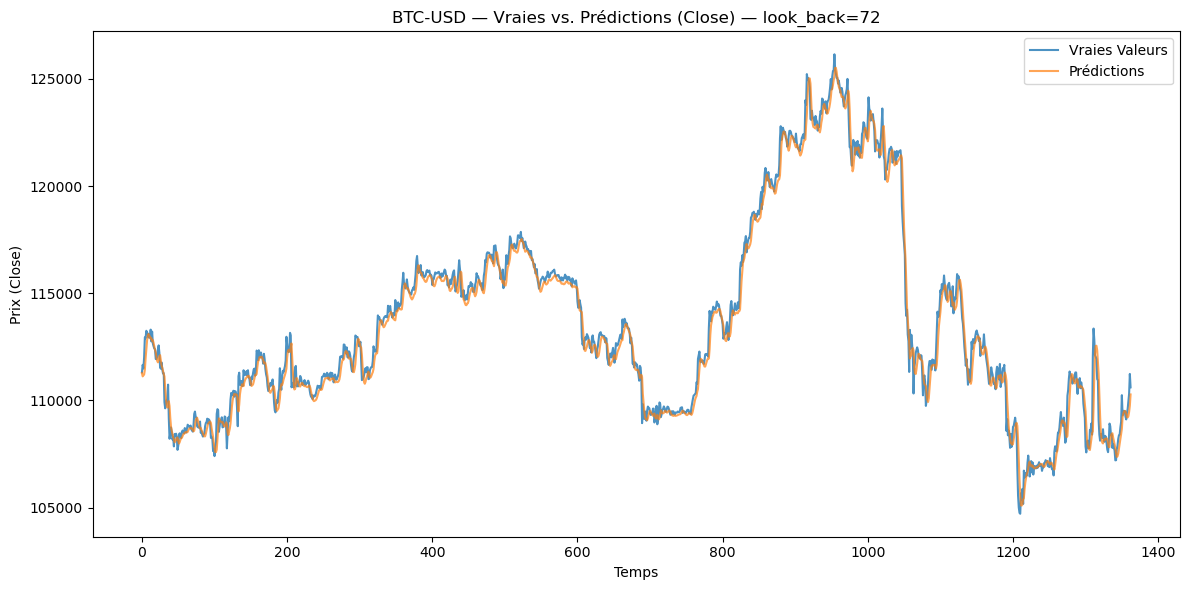

MSE: 326246.94
MAE: 406.42
✅ Modèle et scaler sauvegardés avec succès !


In [1]:
# =============================
# 🔹 1. Imports & Setup
# =============================
%pip install yfinance tensorflow scikit-learn pandas matplotlib joblib --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
 
symbol = "BTC-USD"
interval = "1h"   # Changé de 1m à 1h pour avoir plus de données stables
period = "60d"    # Changé de 7d à 60d pour avoir plus d'historique

df = yf.download(tickers=symbol, interval=interval, period=period)

if df.empty:
    raise ValueError(f"Aucune donnée téléchargée pour {symbol}")

print(f"{df.shape[0]} lignes téléchargées")
df.head()
# =============================
# 🔹 2. Préparation des données
# =============================

# Utiliser seulement le prix de clôture  
data = df[['Close']].astype('float32').values

# Normalisation sur toute la série ( )
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

print(f"Données normalisées: {data_normalized.shape}")
# =============================
# 🔹 3. Génération des séquences avec TimeseriesGenerator
# =============================

look_back = 72  # Même valeur que 
split_idx = int(len(data_normalized) * 0.9)

train_generator = TimeseriesGenerator(
    data_normalized, data_normalized,
    length=look_back, batch_size=32,
    start_index=0, end_index=split_idx - 1
)

val_generator = TimeseriesGenerator(
    data_normalized, data_normalized,
    length=look_back, batch_size=32,
    start_index=split_idx - look_back  # permet au premier target de val d'être à split_idx
)

print(f"Générateur créé avec look_back={look_back}")
print(f"Nombre de batches: {len(train_generator)}")

# Supprimer la classe CBAM_Block_1D - pas nécessaire pour ce cas simple
pass
# =============================
# 🔹 4. Construction du modèle LSTM
# =============================

model = Sequential([
    LSTM(50, input_shape=(look_back, 1)),  # Simplifié: 1 feature au lieu de 3
    Dense(1)  # Prédiction d'1 seul pas au lieu de 3
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# =============================
# 🔹 5. Entraînement (simplifié)
# =============================

history = model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1)

# =============================
# 🔹 6. Prédictions et visualisation
# =============================

# Générateur pour les prédictions
test_generator = TimeseriesGenerator(
    data_normalized, data_normalized,
    length=look_back, batch_size=1
)

# Prédictions
predictions_normalized = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions_normalized)

# Vraies valeurs (on saute les look_back premiers points)
vraies_valeurs = data[look_back:]


plt.figure(figsize=(8,4))
plt.plot(history.history.get('loss', []), label='train_loss')

if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
    
plt.title('Courbe de loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(vraies_valeurs, label='Vraies Valeurs', alpha=0.8)
plt.plot(predictions, label='Prédictions', alpha=0.7)
plt.title(f"BTC-USD — Vraies vs. Prédictions (Close) — look_back={look_back}")
plt.xlabel('Temps')
plt.ylabel('Prix (Close)')
plt.legend()
plt.tight_layout()
plt.show()

# Calcul de quelques métriques
mse = np.mean((vraies_valeurs - predictions)**2)
mae = np.mean(np.abs(vraies_valeurs - predictions))
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# =============================
# 🔹 7. Sauvegarde du modèle et du scaler
# =============================
import joblib

# model.save("simple_lstm_model.h5")
# joblib.dump({"scaler": scaler, "look_back": look_back}, "simple_preproc.pkl")

print("✅ Modèle et scaler sauvegardés avec succès !")
 

In [2]:
# === Baseline : LSTM simple ===
# Entraîne un LSTM simple, prédit sur test_generator et stocke résultats dans preds_lstm
try:
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.metrics import mean_squared_error, mean_absolute_error
except Exception as e:
    raise RuntimeError("Dependencies missing: ensure tensorflow and sklearn are installed")

# Parameters
epochs = 30

# build baseline LSTM
n_features = 1 if ("data_normalized" in globals() and data_normalized.ndim == 2 and data_normalized.shape[1] == 1) else (train_generator[0][0].shape[-1])
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, n_features)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

# callbacks
es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# fit
history_lstm = model_lstm.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=[es, rlr], verbose=1)

# predict on test
preds_lstm_norm = model_lstm.predict(test_generator)
# invert scaler if available
if 'scaler' in globals():
    preds_lstm = scaler.inverse_transform(preds_lstm_norm)
else:
    preds_lstm = preds_lstm_norm

# true values from test_generator (inverse scaled)
y_test_norm = np.vstack([y for _, y in test_generator])
if 'scaler' in globals():
    y_test = scaler.inverse_transform(y_test_norm)
else:
    y_test = y_test_norm

print('Baseline LSTM done — predictions shape:', preds_lstm.shape, 'true shape:', y_test.shape)


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0754 - mae: 0.1731 - val_loss: 0.0067 - val_mae: 0.0718 - learning_rate: 0.0010
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mae: 0.0522 - val_loss: 0.0043 - val_mae: 0.0544 - learning_rate: 0.0010
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mae: 0.0397 - val_loss: 0.0039 - val_mae: 0.0501 - learning_rate: 0.0010
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mae: 0.0387 - val_loss: 0.0030 - val_mae: 0.0411 - learning_rate: 0.0010
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022 - mae: 0.0350 - val_loss: 0.0034 - val_mae: 0.0447 - learning_rate: 0.0010
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mae: 0.0356 - val_loss: 0.0029 - val_mae: 0.0398 - learning_rate: 0.0010
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mae: 0.0395 - val_loss: 0.0037 - val_mae: 0.0473 - learning_rate: 0.0010
Epoch 8/30
39

In [3]:
# === Hybrid : LSTM + GRU ===
# Construire un modèle combinant LSTM puis GRU (simple) et comparer
from tensorflow.keras.layers import GRU

model_hybrid = Sequential([
    LSTM(64, return_sequences=True, input_shape=(look_back, n_features)),
    GRU(32),
    Dense(1)
])
model_hybrid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_hybrid.summary()

history_hybrid = model_hybrid.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=[es, rlr], verbose=1)

preds_hybrid_norm = model_hybrid.predict(test_generator)
if 'scaler' in globals():
    preds_hybrid = scaler.inverse_transform(preds_hybrid_norm)
else:
    preds_hybrid = preds_hybrid_norm

print('Hybrid LSTM+GRU done — predictions shape:', preds_hybrid.shape)


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 72, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,337 (102.88 KB)

 Trainable params: 26,337 (102.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0159 - mae: 0.0895 - val_loss: 0.0063 - val_mae: 0.0696 - learning_rate: 0.0010
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - mae: 0.0337 - val_loss: 0.0028 - val_mae: 0.0373 - learning_rate: 0.0010
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021 - mae: 0.0341 - val_loss: 0.0024 - val_mae: 0.0337 - learning_rate: 0.0010
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015 - mae: 0.0279 - val_loss: 0.0024 - val_mae: 0.0330 - learning_rate: 0.0010
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - mae: 0.0257 - val_loss: 0.0024 - val_mae: 0.0328 - learning_rate: 0.0010
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0016 - mae: 0.0289 - val_loss: 0.0023 - val_mae: 0.0320 - learning_rate: 0.0010
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - mae: 0.0314 - val_loss: 0.0030 - val_mae: 0.0429 - learning_rate: 0.0010
Epoch 8/30
39

Baseline LSTM -> MSE: 781695.2500, MAE: 641.6798
Hybrid LSTM+GRU -> MSE: 370017.5312, MAE: 412.9706


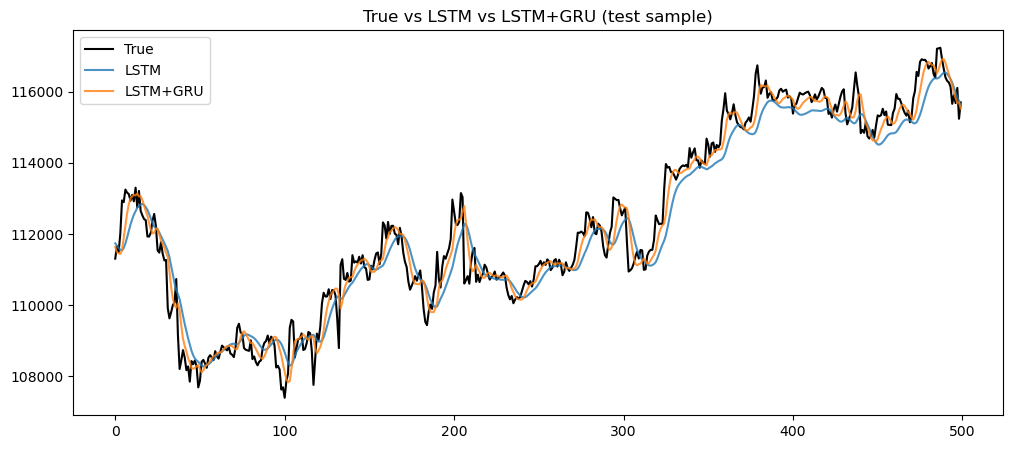

,model,mse,mae
0,LSTM,781695.25000,641.679810
1,LSTM+GRU,370017.53125,412.970551


In [4]:
# === Comparaison des modèles ===
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ensure y_test available
try:
    y_true = y_test
except NameError:
    y_test_norm = np.vstack([y for _, y in test_generator])
    y_true = scaler.inverse_transform(y_test_norm) if 'scaler' in globals() else y_test_norm

mse_lstm = mean_squared_error(y_true, preds_lstm)
mae_lstm = mean_absolute_error(y_true, preds_lstm)

mse_hybrid = mean_squared_error(y_true, preds_hybrid)
mae_hybrid = mean_absolute_error(y_true, preds_hybrid)

print('Baseline LSTM -> MSE: %.4f, MAE: %.4f' % (mse_lstm, mae_lstm))
print('Hybrid LSTM+GRU -> MSE: %.4f, MAE: %.4f' % (mse_hybrid, mae_hybrid))

# plot comparison (first 500 points to keep it readable)
nplot = min(500, len(y_true))
plt.figure(figsize=(12,5))
plt.plot(y_true[:nplot], label='True', color='black')
plt.plot(preds_lstm[:nplot], label='LSTM', alpha=0.8)
plt.plot(preds_hybrid[:nplot], label='LSTM+GRU', alpha=0.8)
plt.legend(); plt.title('True vs LSTM vs LSTM+GRU (test sample)'); plt.show()

# small table summary
import pandas as pd
summary = pd.DataFrame({
    'model': ['LSTM', 'LSTM+GRU'],
    'mse': [mse_lstm, mse_hybrid],
    'mae': [mae_lstm, mae_hybrid]
})
summary
